In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)

In [5]:
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))


In [6]:
encoder_input=tf.keras.Input(shape=(28,28,1))
encoder_layer1=tf.keras.layers.Flatten()(encoder_input)

encoder_layer3=tf.keras.layers.Dense(100,activation='relu')(encoder_layer1)

encoder=tf.keras.Model(encoder_input,encoder_layer3)


decoder_layer2=tf.keras.layers.Dense(784,activation='relu')(encoder_layer3)
decoder_output=tf.keras.layers.Reshape((28,28,1))(decoder_layer2)

model=tf.keras.Model(encoder_input,decoder_output)
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics='accuracy')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(x_train,x_train,epochs=20,batch_size=200)

In [8]:
model.evaluate(x_test,x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 0.8072


[0.001502732397057116, 0.8072464466094971]

In [9]:
x_train_noise=x_train+0.3*np.random.normal(loc=0,scale=1,size=x_train.shape)
x_test_noise=x_test+0.3*np.random.normal(loc=0,scale=1.0,size=x_test.shape)


x_train_noise=np.clip(x_train_noise,a_min=0,a_max=1)
x_test_noise=np.clip(x_test_noise,a_min=0,a_max=1)

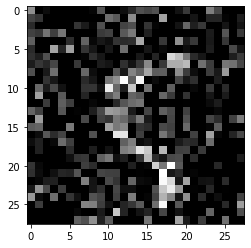

In [10]:
index=100
plt.imshow(x_train[index].reshape(28,28),cmap='gray')
plt.imshow(x_train_noise[index].reshape(28,28),cmap='gray')

In [ ]:
model.fit(x_train_noise,x_train,epochs=100,batch_size=100)
model.save('auto.h5')

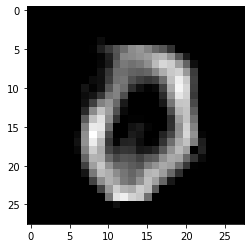

In [12]:
index=28
b=model.predict(x_test_noise[index].reshape(1,28,28,1))
plt.imshow(b.reshape(28,28),cmap='gray')
#plt.imshow(x_test_noise[index])

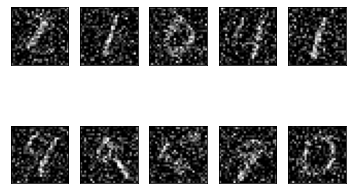

In [25]:
# image with noise

for i in range(1,11):
    ax=plt.subplot(2,5,i)
    plt.imshow(x_test_noise[i].reshape(28,28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

 


plt.show()


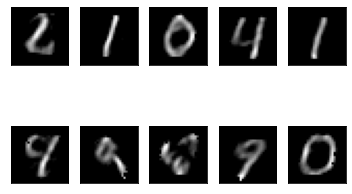

In [26]:
#image after removing noise

for i in range(1,11):
    ax=plt.subplot(2,5,i)
    b=model.predict(x_test_noise[i].reshape(1,28,28,1))
    plt.imshow(b.reshape(28,28),cmap='gray')
 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() 